***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python MicroKinetics Code}}$$<br>
$\mathbf{\text{Date: 10/22}}$<br>
***

$$ {CO}^{*} + {O_2}^{*} \rightleftharpoons {{CO}_2}(g) + O^* + * $$  <br> 

## Model 1

***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
$Ea = 80kJ{mol}^{-1}->120kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO / Desorption of CO*

$$ CO(g) + * \rightleftharpoons CO^{*} $$  <br> 

Reaction 2:&emsp;Adsorption of $O_2$ / Desorption of $O_2^*$

$$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $$  <br> 

Reaction 3:&emsp;Dissociation of ${O_2}^*$ / Recombination of O*

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$  <br> 

Reaction 4:&emsp;Surface Reaction of CO* and ${O_2}^*$ / Adsorption of $CO_2$

$$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}(g) + 2* $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\\
r_5 &   0     &   0     &   1     &     -1       &    1      &     -1        &   1\end{bmatrix}
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



$$k(\theta) = k_{ref} * f(\theta)$$

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
MKM1 = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv')

Mass is conserved. 

Thermodynamically constrained (with pseudo Keq)


In [3]:
MKM1.set_initial_coverages(init=[0,0,0,1]) 
MKM1.set_rxnconditions() 
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)

(0, 6000000.0)

<IPython.core.display.Javascript object>


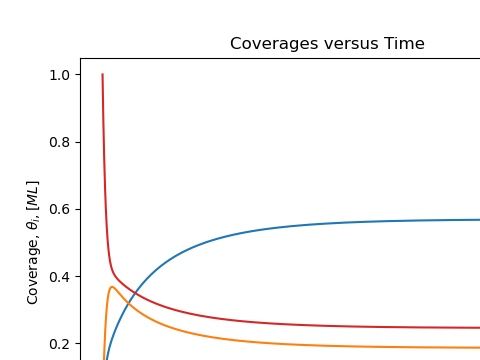

In [4]:
sol1,solt1= MKM1.solve_coverage(plot=True) 

In [5]:
MKM1.Keq

13003.600735533166

In [6]:
MKM1.Stoichiometric_numbers

array([[1. ],
       [0.5],
       [0.5],
       [1. ]])

In [7]:
print(MKM1.get_SS_coverages()) #Printing the Steady state coverages (Note: Additional options can be set manually - See main.py for syntax)

Steady State Reached
[0.5684699710924661 0.18613321390156254 4.9286975503134235e-12
 0.24539681500104255]


Other possible features that weren't used (but also work) include:
- solve_rate_reaction(tf=None,initial_coverage=[],plot=False)
- solve_rate_production(tf=None,initial_coverage=[],plot=False)
- get_SS_rates_reaction(tf=None)
- get_SS_rates_production(tf=None)

### Dynamic Pressure Modulation


Periodic Simulation of coverages 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+06 s
Time in State 2: 2.000000e+06 s

Number of Cycles: 2.5
Total Elapsed Reaction Time: 10000000.0 



<IPython.core.display.Javascript object>


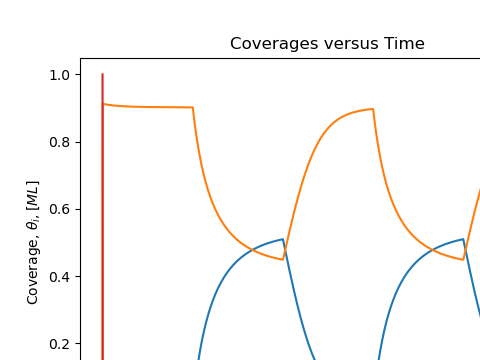

In [8]:
sol2,solt2 = MKM1.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=2e6,t2=2e6,total_time=10e6,label='coverages',plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions

Other possible features that weren't used (but also work) include:
- dynamic_transient_rates_reaction(State1=[],State2=[],plot=False)
- dynamic_transient_rates_production(State1=[],State2=[],plot=False)

### Including Coverage Dependance 

In [9]:
MKM1CD = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv')
MKM1CD.rate_const_correction='Forced_exp_CD'

Mass is conserved. 

Thermodynamically constrained (with pseudo Keq)


In [10]:
MKM1CD.set_initial_coverages(init=[0,0,0,1])
MKM1CD.set_rxnconditions()
MKM1CD.set_limits_of_integration(Ti=0,Tf=6e6)

(0, 6000000.0)

<IPython.core.display.Javascript object>


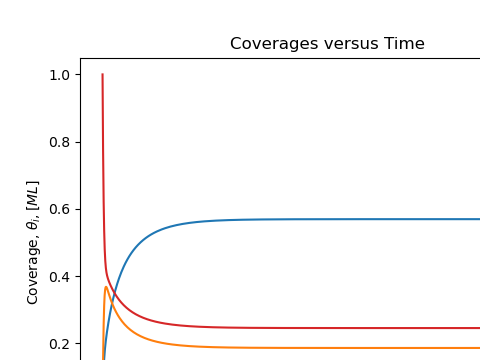

In [11]:
sol1CD,solt1CD= MKM1CD.solve_coverage(plot=True)

In [12]:
print(MKM1CD.get_SS_coverages()) #Printing the Steady state coverages (Note: Additional options can be set manually - See main.py for syntax)

Steady State Reached
[0.569155201460438 0.18579169127382905 4.917518353862655e-12
 0.24505310726081544]


The same additional features also exist in this subpackage

### Dynamic Pressure Modulation

In [13]:
MKM1CD.set_limits_of_integration(Ti=0,Tf=0.4e6) #Changing the time interval so as to view the plot better

(0, 400000.0)


Periodic Simulation of Rates of production 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+04 s
Time in State 2: 3.000000e+04 s

Number of Cycles: 10.0
Total Elapsed Reaction Time: 500000.0 



<IPython.core.display.Javascript object>


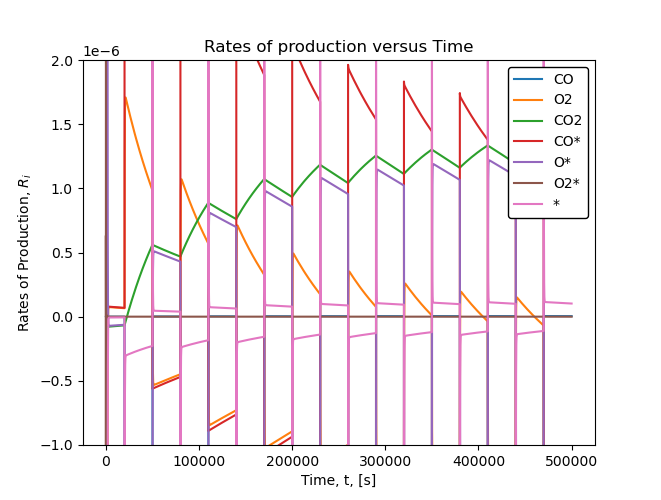

(-1e-06, 2e-06)

In [14]:
sol2CD,solt2CD = MKM1CD.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=.02e6,t2=.03e6,total_time=.5e6,label='rates_p',plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions
plt.ylim([-1e-6,2e-6])

# ----------------------------------------------------------------------------------------

## Model 2

***
$\mathbf{\text{Micro Kinetic Model for (a 7 step Redox Mechanism) Water Gas Shift Reaction}}:$<br>
#### [Link to Relevant Paper](https://www.mdpi.com/2673-4583/2/1/11) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + H_{2}O {\stackrel{\tiny{\textrm{Ni/CeO_2}}}{\rightleftharpoons}} CO_2 + H_2$$
$Ea = -41kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of $CO$ / Desorption of ${CO}^{*}$

$$ {CO}(g) + * \rightleftharpoons {CO}^{*} $$  <br> 


Reaction 2:&emsp;Adsorption of $H_{2}O$ / Desorption of ${H_{2}O}^{*}$

$$ {H_{2}O}(g) + * \rightleftharpoons {H_{2}O}^{*} $$  <br> 


Reaction 3:&emsp;Dissociation of ${H_{2}O}^*$ / Surface Reaction of ${OH}^{*}$ and $H^*$

$$ {H_{2}O}^* + * \rightleftharpoons {OH}^{*} + H^* $$  <br>


Reaction 4:&emsp;Surface Reaction of ${CO}^{*}$ and ${OH}^*$ / Dissociation of ${COOH}^*$ (1)

$$ {CO}^* + {OH}^* \rightleftharpoons {COOH}^{*} + * $$  <br> 


Reaction 5:&emsp;Dissociation of ${COOH}^*$ (2) / Surface Reaction of ${CO_2}^{*}$ and ${H}^*$

$$ {COOH}^* + * \rightleftharpoons {CO_2}^* + {H}^* $$  <br> 


Reaction 6:&emsp;Desorption of $2H^*$ / Adsorption of $H_2$

$$ 2H^{*} \rightleftharpoons {H_2}(g) + 2^* $$  <br> 


Reaction 7:&emsp;Desorption of ${CO_2}^*$ / Adsorption of ${CO}_2$   

$$ {{CO}_2}^{*} \rightleftharpoons {CO_2}(g) + * $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. ${H_2}O$
3. $CO_2$
4. $H_2$
5. ${CO}^*$
6. ${{H_2}O}^*$
7. $H^*$
8. ${OH}^*$
9. ${COOH}^*$
10. ${CO_2}^*$
11. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO  &  {H_2}O &   CO_2  &  H_2  &  {CO}^* & {H_2}O^* &   H^* & {OH}^* & {COOH}^* & {CO_2}^* & *\\
H   &   0   &  2      &   0     &  2    &   0     &   2      &   1   &   1    &    1     &    0     & 0\\
C   &   1   &  0      &   1     &  0    &   1     &   0      &   0   &   0    &    1     &    1     & 0\\
O   &   1   &  1      &   2     &  0    &   1     &   1      &   0   &   1    &    2     &    2     & 0\\
*   &   0   &  0      &   0     &  0    &   1     &   1      &   1   &   1    &    1     &    1     & 1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x11)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    &P_{CO}&P_{{H_2}O}& P_{CO_2}&P_{H_2}&\theta_{CO}&\theta_{{H_2}O}&\theta_{H}&\theta_{OH}&\theta_{COOH}&\theta_{{CO}_2}&\theta_*\\
r1  &  -1   &  0       &   0     &  0    &   1       &   0           &   0      &   0    &    0     &    0     &-1\\
r2  &   0   & -1       &   0     &  0    &   0       &   1           &   0      &   0    &    0     &    0     &-1\\
r3  &   0   &  0       &   0     &  0    &   0       &  -1           &   1      &   1    &    0     &    0     &-1\\
r4  &   0   &  0       &   0     &  0    &  -1       &   0           &   0      &  -1    &    1     &    0     & 1\\
r5  &   0   &  0       &   0     &  0    &   0       &   0           &   1      &   0    &   -1     &    1     &-1\\
r6  &   0   &  0       &   0     &  1    &   0       &   0           &  -2      &   0    &    0     &    0     & 2\\
r7  &   0   &  0       &   1     &  0    &   0       &   0           &   0      &   0    &    0     &   -1     & 1\end{bmatrix}  
\
\end{equation}

Stoichiometric Matrix Size : (7x11)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{{H_2}O} \cdot \theta_{*} - k_{2}^r \cdot \theta_{{H_2}O} $$

$$r_3 = k_{3}^f \cdot \theta_{{H_2}O} \cdot \theta_{*} - k_{3}^r \cdot \theta_{OH} \cdot \theta_{H}$$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{OH} - k_{4}^r \cdot \theta_{COOH} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{COOH} \cdot \theta_{*} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{H}$$

$$r_6 = k_{6}^f \cdot \theta_{H}^2   - k_{6}^r \cdot \textrm{P}_{H_2} \cdot \theta_{*}^2 $$

$$r_7 = k_{7}^f \cdot \theta_{{CO}_2}  - k_{7}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}$$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{{H_2}O}} = \frac{d\theta_{{H_2}O}}{dt} = r_2 - r_3 $$

$$R_{\theta_{H}} = \frac{d\theta_{H}}{dt} = r_3 + r_5 - 2 r_6 $$

$$R_{\theta_{OH}} = \frac{d\theta_{OH}}{dt} = r_3 - r_4 $$

$$R_{\theta_{COOH}} = \frac{d\theta_{COOH}}{dt} = r_4 - r_5 $$

$$R_{\theta_{{CO}_2}} = \frac{d\theta_{{CO}_2}}{dt} = r_5 - r_7 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = r_7 + 2 r_6 + r_4 - r_6 - r_3 - r_2 - r_1 $$



In [15]:
MKM2 = MKModel('Atomic_2.csv','Stoich_2.csv','Param_2.csv')

Mass is conserved. 

Thermodynamically constrained (with pseudo Keq)


In [16]:
MKM2.Stoich

,r\S,P_CO,P_H2O,P_CO2,P_H2,theta_CO,theta_H2O,theta_H,theta_OH,theta_COOH,theta_CO2,theta_*
0,r1,-1,0,0,0,1,0,0,0,0,0,-1
1,r2,0,-1,0,0,0,1,0,0,0,0,-1
2,r3,0,0,0,0,0,-1,1,1,0,0,-1
3,r4,0,0,0,0,-1,0,0,-1,1,0,1
4,r5,0,0,0,0,0,0,1,0,-1,1,-1
5,r6,0,0,0,1,0,0,-2,0,0,0,2
6,r7,0,0,1,0,0,0,0,0,0,-1,1


In [17]:
MKM2.set_initial_coverages(init=[0.5,0.5,0,0,0,0,0])
MKM2.set_rxnconditions()
MKM2.set_limits_of_integration(Ti=0,Tf=3e-11)

(0, 3e-11)

In [18]:
MKM2.Keq

11833670.02314904

In [19]:
MKM2.Stoichiometric_numbers

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

<IPython.core.display.Javascript object>


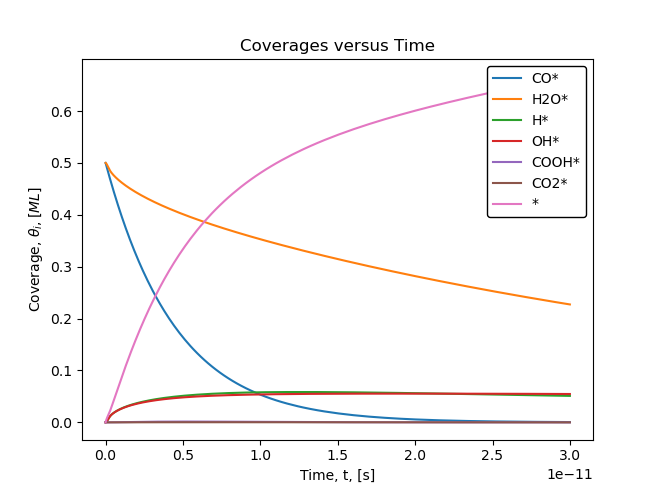

In [20]:
sol3,solt3= MKM2.solve_coverage(plot=True)

In [21]:
(MKM2.get_SS_coverages()) #When using the inputed limit of integration, as seen above, the steady state was not reached

array([0.0006011478344193436, 0.22727067661732883, 0.05102392624428458,
       0.05467204537328837, 8.935554586137987e-06, 3.1786386561200987e-06,
       0.6664200897374215], dtype=object)

In [22]:
(MKM2.get_SS_coverages(9e-10)) #Changing the tf (Final Time) from 4e11 to 9e-10, allowed for the steady state to be reached

Steady State Reached


array([2.0321140307721186e-08, 2.09014940374641e-06,
       1.7105512495602753e-06, 0.022024359408794734,
       1.6365672004618412e-12, 2.2383913828369107e-09, 0.9779718173293703],
      dtype=object)

### Dynamic Pressure Modulation

In [23]:
MKM2.set_limits_of_integration(Ti=0,Tf=1.5e-10) #Need to change the limits of integration to view the plot of transient rates of production properly

(0, 1.5e-10)


Periodic Simulation of coverages 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | H2O |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |
|  3 | H2  |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+05 s
Time in State 2: 2.000000e+05 s

Number of Cycles: 0.25
Total Elapsed Reaction Time: 100000.0 



<IPython.core.display.Javascript object>


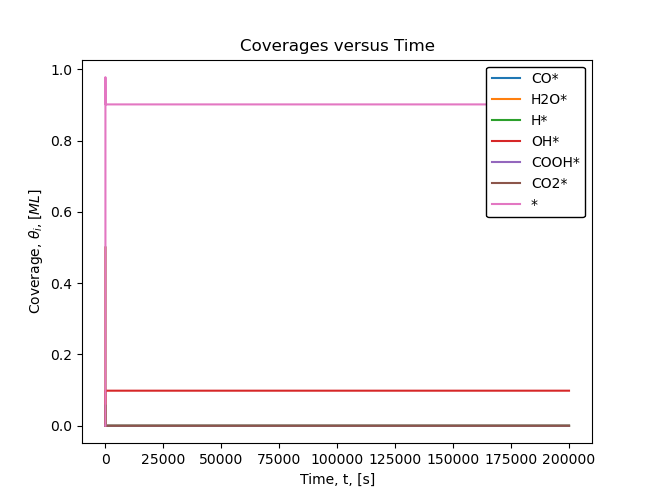

In [25]:
sol4,solt4 = MKM2.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8,1e-8],State2=[0.8e-5,2e-6,1e-8,1e-8],t1=.2e6,t2=.2e6,total_time=.2e6,label='rates_p',plot=True)
plt.ylim([-1e-6,2e-6])

### Including Coverage Dependance (Making use of the MKModel_wCD subpackage)

In [26]:
MKM2CD = MKModel('Atomic_2.csv','Stoich_2.csv','Param_2.csv')
MKM2CD.rate_const_correction='Forced_exp_CD'

Mass is conserved. 

Thermodynamically constrained (with pseudo Keq)


In [27]:
MKM2CD.set_initial_coverages(init=[0.5,0.5,0,0,0,0,0])
MKM2CD.set_rxnconditions()
MKM2CD.set_limits_of_integration(Ti=0,Tf=4e-11)

(0, 4e-11)

<IPython.core.display.Javascript object>


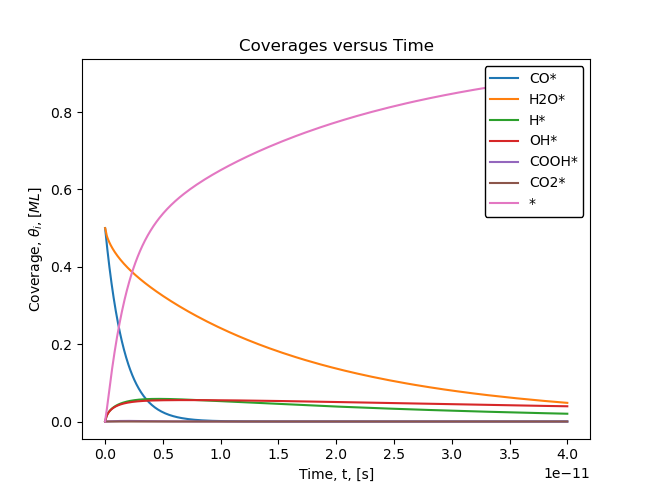

In [28]:
sol3CD,solt3CD= MKM2CD.solve_coverage(plot=True)

In [29]:
(MKM2CD.get_SS_coverages()) #When using the inputed limit of integration, as seen above, the steady state was not reached

array([1.83169355844264e-08, 0.04822686752878161, 0.020126974758038124,
       0.03938845604334542, 1.646514110137821e-09, 2.064750174370392e-09,
       0.8922576796415771], dtype=object)

In [30]:
(MKM2CD.get_SS_coverages(9e-10)) #Changing the tf (Final Time) from 4e11 to 9e-10, allowed for the steady state to be reached

Steady State Reached


array([2.0321257628530128e-08, 2.601123812349331e-07,
       2.1273685968165066e-07, 0.02202276591421802,
       1.5154711000428664e-12, 2.2384006131956097e-09, 0.9779767386753091],
      dtype=object)

### Dynamic Pressure Modulation

In [31]:
MKM2CD.set_limits_of_integration(Ti=0,Tf=1.5e-10) #Need to change the limits of integration to view the plot of transient rates of production properly

(0, 1.5e-10)

In [34]:
sol4CD,solt4CD = MKM2CD.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8,1e-8],State2=[0.8e-5,2e-6,1e-8,1e-8],t1=.2e6,t2=.2e6,total_time=.2e6,label='rates_p',plot=True)
plt.ylim([-1e-6,2e-6])

KeyboardInterrupt: 